In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import re
import string
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Project Team 11/MovieReviewTrainingDatabase[1].csv')

In [ ]:
# top values of the data-set
data.head()

,sentiment,review
0,Positive,With all this stuff going down at the moment w...
1,Positive,'The Classic War of the Worlds' by Timothy Hin...
2,Negative,The film starts with a manager (Nicholas Bell)...
3,Negative,It must be assumed that those who praised this...
4,Positive,Superbly trashy and wondrously unpretentious 8...


In [ ]:
data.shape

(25000, 2)

In [ ]:
data.columns

Index(['sentiment', 'review'], dtype='object')

In [ ]:
data['sentiment'].value_counts()

Positive    12500
Negative    12500
Name: sentiment, dtype: int64

In [ ]:
def clean_text1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

cleaned1=lambda x:clean_text1(x)
data['review']=pd.DataFrame(data.review.apply(cleaned1))
data.head()

,sentiment,review
0,Positive,with all this stuff going down at the moment w...
1,Positive,the classic war of the worlds by timothy hines...
2,Negative,the film starts with a manager nicholas bell g...
3,Negative,it must be assumed that those who praised this...
4,Positive,superbly trashy and wondrously unpretentious ...


In [ ]:
def clean_text2(text):
    text=re.sub('[''"",,,]','',text)
    text=re.sub('\n','',text)
    return text

cleaned2=lambda x:clean_text2(x)
data['review']=pd.DataFrame(data.review.apply(cleaned2))
data.head()


,sentiment,review
0,Positive,with all this stuff going down at the moment w...
1,Positive,the classic war of the worlds by timothy hines...
2,Negative,the film starts with a manager nicholas bell g...
3,Negative,it must be assumed that those who praised this...
4,Positive,superbly trashy and wondrously unpretentious ...


In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
def stemming(review):
  stemmer = PorterStemmer()
  words = review.split()
  stemmed = [stemmer.stem(w) for w in words]
  stemmed = ' '.join(stemmed)
  return stemmed
data['review'] = data['review'].apply(stemming)
data.head()

,sentiment,review
0,Positive,with all thi stuff go down at the moment with ...
1,Positive,the classic war of the world by timothi hine i...
2,Negative,the film start with a manag nichola bell give ...
3,Negative,it must be assum that those who prais thi film...
4,Positive,superbl trashi and wondrous unpretenti exploit...


In [ ]:
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = stopwords.words('english')
print(sorted(stop_words))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [ ]:
def remove_stopwords(review):
  words = review.split()
  cleaned = [w for w in words if w not in stop_words]
  cleaned = ' '.join(cleaned)
  return cleaned 
data['review'] = data['review'].apply(remove_stopwords)
data.head()

,sentiment,review
0,Positive,thi stuff go moment mj ive start listen hi mus...
1,Positive,classic war world timothi hine veri entertain ...
2,Negative,film start manag nichola bell give welcom inve...
3,Negative,must assum prais thi film greatest film opera ...
4,Positive,superbl trashi wondrous unpretenti exploit hoo...


In [ ]:
from wordcloud import WordCloud

**Word Clouds for Positive Words**

<function matplotlib.pyplot.show(close=None, block=None)>

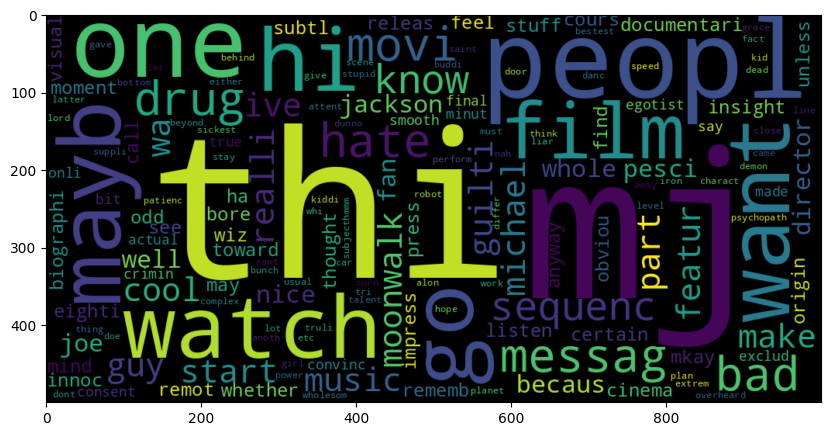

In [ ]:
plt.figure(figsize=(10,10))
positive_text= data.review[0]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

**Word Clouds for Negative Words**

<function matplotlib.pyplot.show(close=None, block=None)>

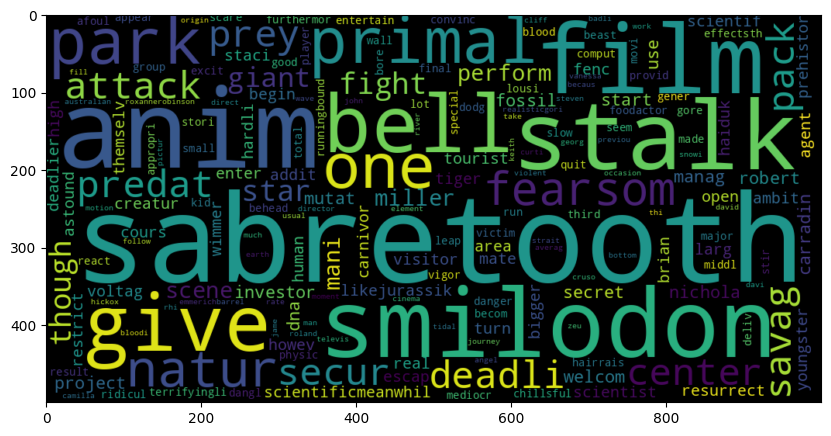

In [ ]:
plt.figure(figsize=(10,10))
negative_text= data.review[2]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
data['sentiment'] = lb.fit_transform(data['sentiment'])
print(data['sentiment'])

0        1
1        1
2        0
3        0
4        1
        ..
24995    0
24996    0
24997    0
24998    0
24999    1
Name: sentiment, Length: 25000, dtype: int64


In [ ]:
x = data['review']
y = data['sentiment']
xtrain,xtest,ytrain,ytest = tts(x,y,test_size = 0.3,random_state = 500)

In [ ]:
tf = TfidfVectorizer()
from sklearn.pipeline import Pipeline

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
model=Pipeline([('vectorizer',tf),('classifier',classifier)])

model.fit(xtrain,ytrain)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [ ]:
ypred=model.predict(xtest)

accuracy_score(ypred,ytest)

0.8893333333333333

In [ ]:
# confusion matrix
A=confusion_matrix(ytest,ypred)
print(A)

[[3254  445]
 [ 385 3416]]


**ROC AND AUC CURVER**

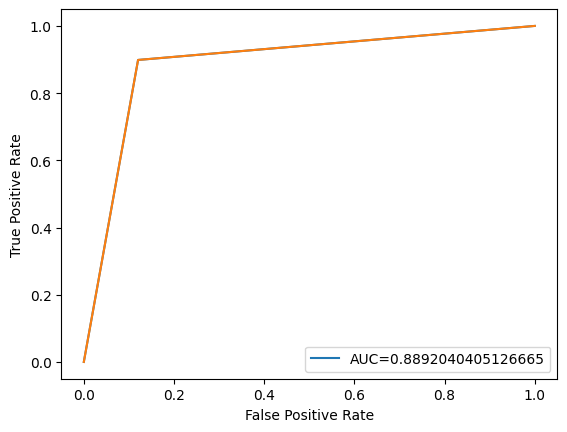

In [ ]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(ytest, ypred)
auc = metrics.roc_auc_score(ytest, ypred)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

**NAIVES BAYES**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb=MultinomialNB()
mnbmodel = Pipeline([('vectorizer',tf),('classifier',mnb)])
mnbmodel.fit(xtrain,ytrain)



Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [ ]:
ypred = mnbmodel.predict(xtest)

accuracy_score(ypred,ytest)

0.8589333333333333

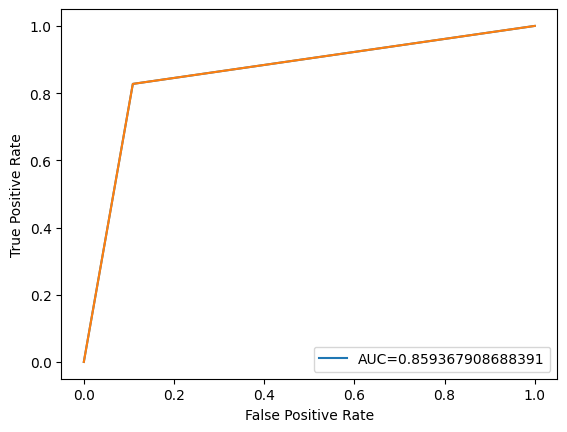

In [ ]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(ytest, ypred)
auc = metrics.roc_auc_score(ytest, ypred)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

**SUPPORT VECTOR CLASIFIER**

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svc = LinearSVC()
svcmodel = Pipeline([('vectorizer',tf),('classifier',svc)])
svcmodel.fit(xtrain,ytrain)


Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('classifier', LinearSVC())])

In [ ]:
ypred = svcmodel.predict(xtest)
accuracy_score(ypred,ytest)

0.8885333333333333

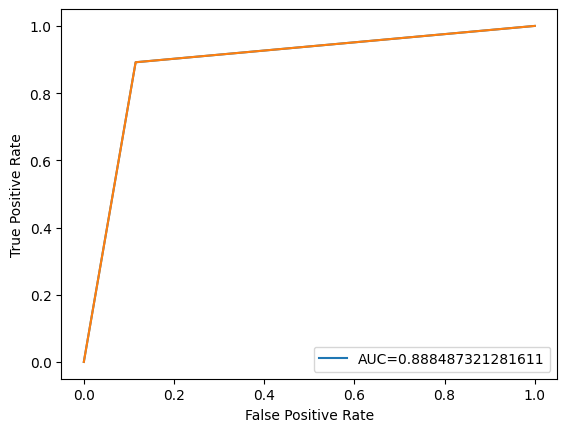

In [ ]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(ytest, ypred)
auc = metrics.roc_auc_score(ytest, ypred)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

**KNN**

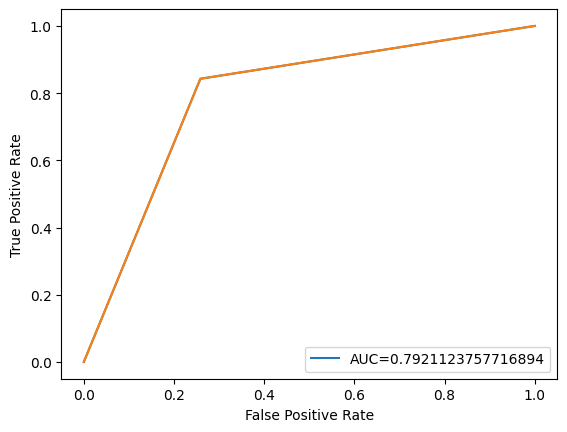

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
model=Pipeline([('vectorizer',tf),('classifier',knn)])

model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy_score(ypred,ytest)
fpr, tpr, _ = metrics.roc_curve(ytest,  ypred)
auc = metrics.roc_auc_score(ytest, ypred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


In [ ]:
!pip install gradio
import gradio as gd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 K

**GRADIO TESTING**

In [ ]:
def get_sentiment(input_text):
   input_text = clean_text1(input_text)
   input_test = clean_text2(input_text)
   input_text = stemming(input_text)
   input_text = remove_stopwords(input_text)
   rev = [input_text]
   out = model.predict(rev)
   if(out == 1):
     return "Positive Review"
   else:
     return "Negative Review"
   

In [ ]:
iface = gd.Interface(fn = get_sentiment, inputs = "text", outputs = ['text'],title = 'Sentiment Analysis')

In [ ]:
iface.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>